# Unsupervised Learning

In [2]:
# import all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading & Inspection

In [10]:
# Loading the datasets

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

In [11]:
ratings.shape

(32000204, 4)

In [12]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,32000204.0,1.002785e+05,5.794905e+04,1.0,5.005300e+04,1.002970e+05,1.504510e+05,2.009480e+05
movieId,32000204.0,2.931861e+04,5.095816e+04,1.0,1.233000e+03,3.452000e+03,4.419900e+04,2.927570e+05
rating,32000204.0,3.540396e+00,1.058986e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,32000204.0,1.275241e+09,2.561630e+08,789652004.0,1.051012e+09,1.272622e+09,1.503158e+09,1.697164e+09


In [13]:
print("\nColumn Value Ranges")
for col in ['userId', 'movieId', 'rating', 'timestamp']:
    if pd.api.types.is_numeric_dtype(ratings[col]):
        print(f"{col}: Min={ratings[col].min()}, Max={ratings[col].max()}")


Column Value Ranges
userId: Min=1, Max=200948
movieId: Min=1, Max=292757
rating: Min=0.5, Max=5.0
timestamp: Min=789652004, Max=1697164147


In [14]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## 2. Preprocessing

In [15]:
print("Original memory usage:")
print(ratings.info(memory_usage='deep'))

Original memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None


In [16]:
# Downcasting numeric columns
for col in ['userId', 'movieId', 'timestamp']:
    ratings[col] = pd.to_numeric(ratings[col], downcast='integer')

ratings['rating'] = pd.to_numeric(ratings['rating'], downcast='float')

print("\nMemory usage after downcasting:")
print(ratings.info(memory_usage='deep'))


Memory usage after downcasting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 488.3 MB
None


In [17]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [18]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
# Merge on MovieID

merged = pd.merge(ratings, movies, on='movieId', how='left')

In [20]:
merged.head()

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,944250228,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,943230976,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
4,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


In [21]:
# Remove useless columns
merged = merged.drop(columns=['timestamp', 'title'], axis=1)
print(merged.columns.tolist())

merged.head()

['userId', 'movieId', 'rating', 'genres']


,userId,movieId,rating,genres
0,1,17,4.0,Drama|Romance
1,1,25,1.0,Drama|Romance
2,1,29,2.0,Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,Crime|Drama
4,1,32,5.0,Mystery|Sci-Fi|Thriller


#### Sampling

To manage computational resources and project scope, we will sample 5% of the dataset. This is necessary due to the original dataset expanding to approximately 60 million entries after exploding the genres column.

In [ ]:
from sklearn.model_selection import train_test_split

# Explode genres
merged['genres'] = merged['genres'].str.split('|')
merged = merged.explode('genres')
merged = merged[merged['genres'] != '(no genres listed)']

# Stratified sampling: 5% based on genre
sampled_df, _ = train_test_split(
    merged,
    test_size=0.95,
    stratify=merged['genres'],
    random_state=42
)

# Save to CSV
sampled_df.to_csv("sampled_dataset.csv", index=False)
merged.to_csv('processed_dataset.csv', index=False)

## 3. EDA

In [3]:
# Load the Sampled Dataset

df = pd.read_csv("sampled_dataset_05.csv")

df.head()

,userId,movieId,rating,genres
0,72775,3578,3.0,Drama
1,94622,87869,3.5,Crime
2,16800,69844,3.5,IMAX
3,189772,288,5.0,Crime
4,97486,2382,4.0,Comedy


In [4]:
df.shape

(43531, 4)

In [5]:
df['genres'].value_counts()

genres
Drama          6987
Comedy         5603
Action         4833
Thriller       4340
Adventure      3795
Sci-Fi         2859
Romance        2762
Crime          2686
Fantasy        1851
Children       1366
Mystery        1308
Horror         1246
Animation      1107
War             797
IMAX            747
Musical         580
Western         298
Documentary     214
Film-Noir       152
Name: count, dtype: int64

/tmp/ipykernel_289633/3873620367.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


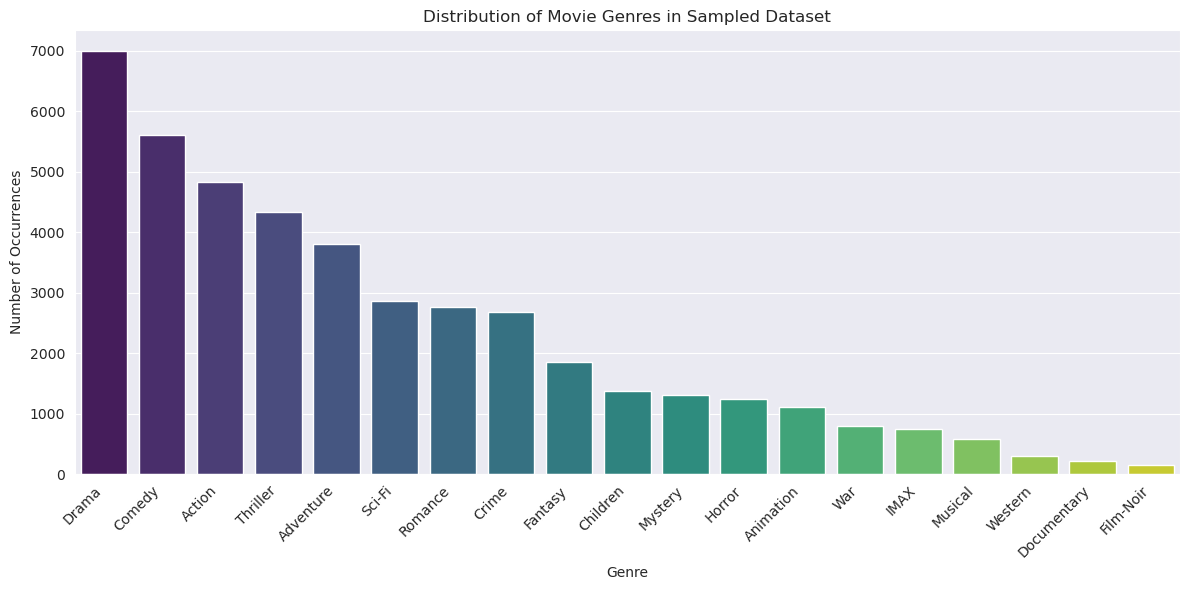

In [6]:
# Set plot style and figure size
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Calculate genre counts
genre_counts = df['genres'].value_counts()

# Create the bar chart
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

plt.title('Distribution of Movie Genres in Sampled Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

In [7]:
print(f"Unique users: {df['userId'].nunique()}")
print(f"Unique movies: {df['movieId'].nunique()}")

Unique users: 32923
Unique movies: 6762


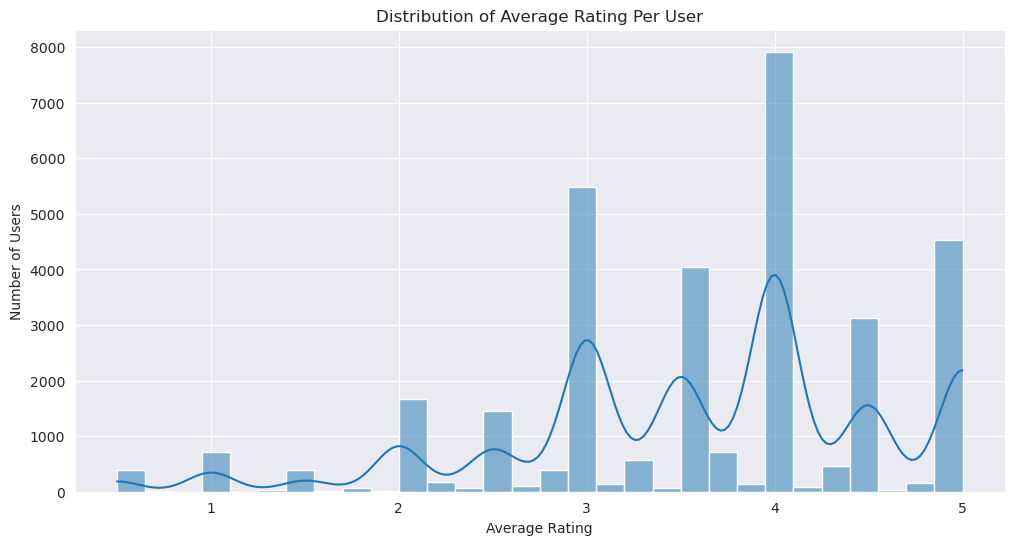

In [8]:
# Rating density
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

plt.title('Distribution of Average Rating Per User')
average_rating_per_user = df.groupby('userId')['rating'].mean()
sns.histplot(average_rating_per_user, bins=30, kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')

plt.show()

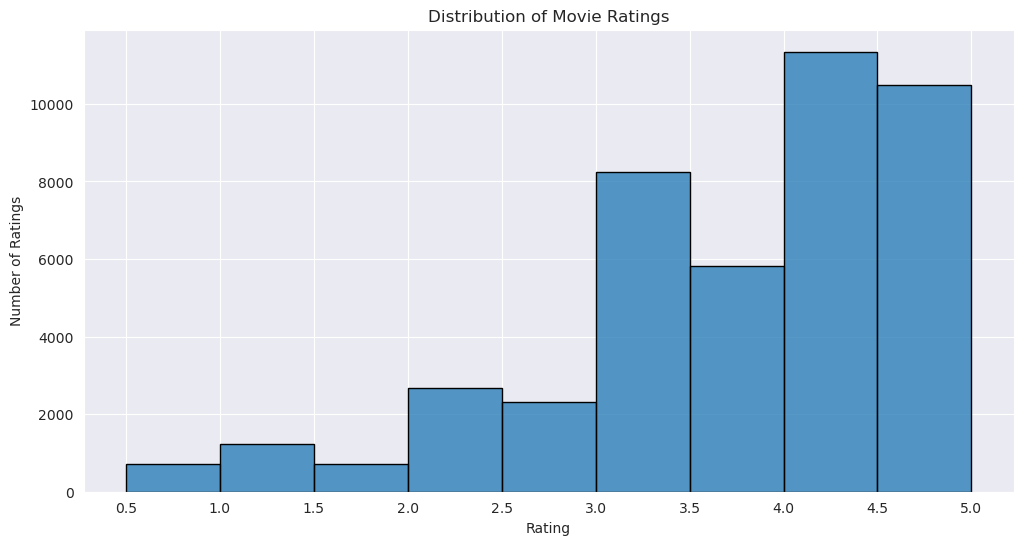

In [9]:
# Set style and figure size
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Distribution of Ratings
plt.title('Distribution of Movie Ratings')
sns.histplot(df['rating'], bins=np.arange(0.5, 5.5, 0.5), kde=False, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(np.arange(0.5, 5.5, 0.5))

plt.show()

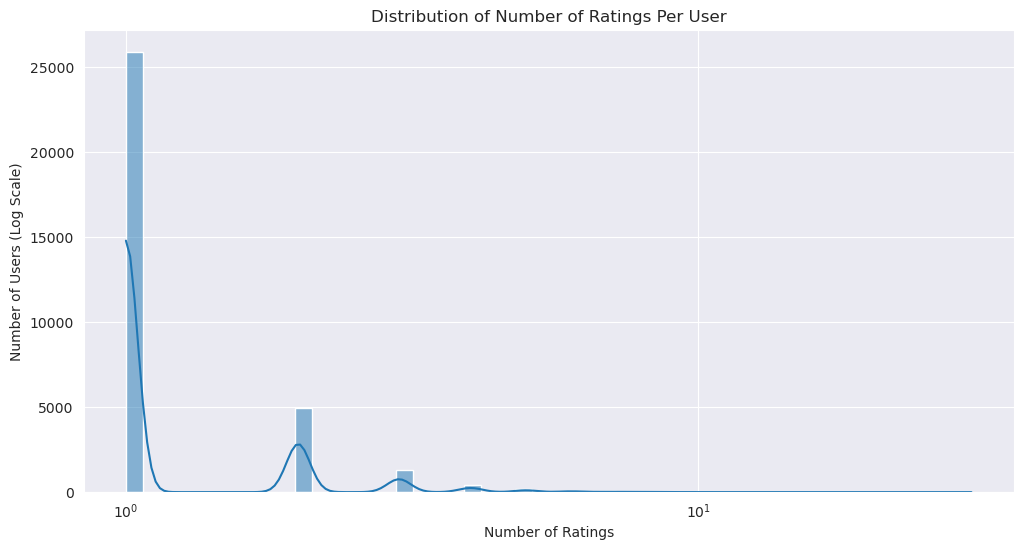

In [10]:

# Distribution of Number of Ratings Per User
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

plt.title('Distribution of Number of Ratings Per User')
ratings_per_user = df['userId'].value_counts()
sns.histplot(ratings_per_user, bins=50, kde=True, log_scale=True)

plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users (Log Scale)')
plt.show()

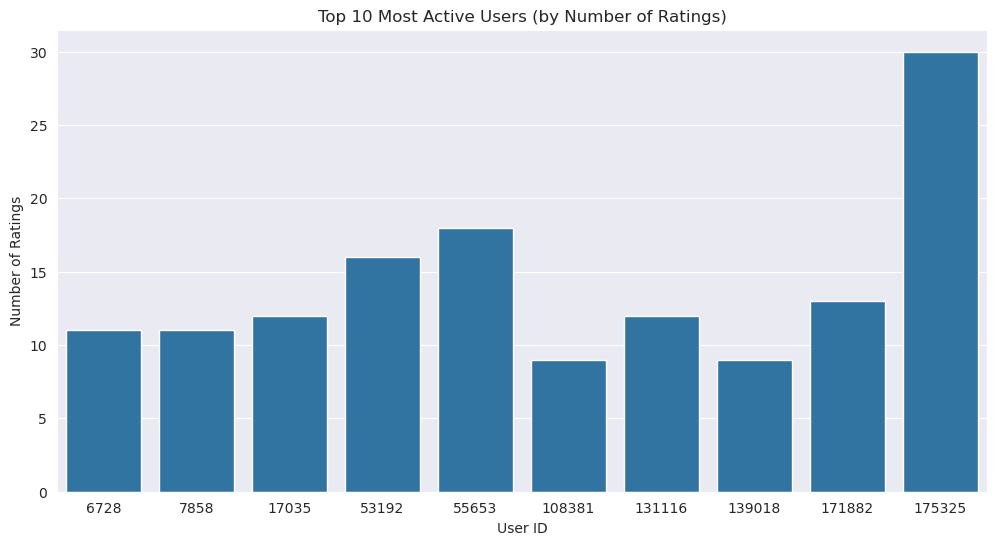

In [11]:
# Top 10 Most Active Users ---
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

plt.title('Top 10 Most Active Users (by Number of Ratings)')
top_users = df['userId'].value_counts().head(10)
sns.barplot(x=top_users.index, y=top_users.values)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')

plt.show()

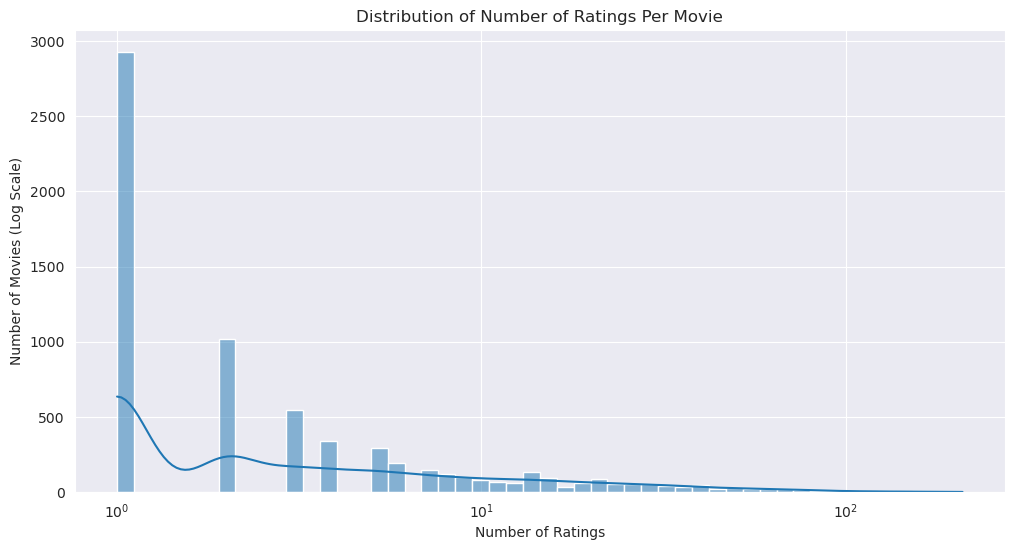

In [12]:
# Distribution of Number of Ratings Per Movie

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")


plt.title('Distribution of Number of Ratings Per Movie')
ratings_per_movie = df['movieId'].value_counts()
sns.histplot(ratings_per_movie, bins=50, kde=True, log_scale=True) # Log scale for highly skewed data
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies (Log Scale)')

plt.show()

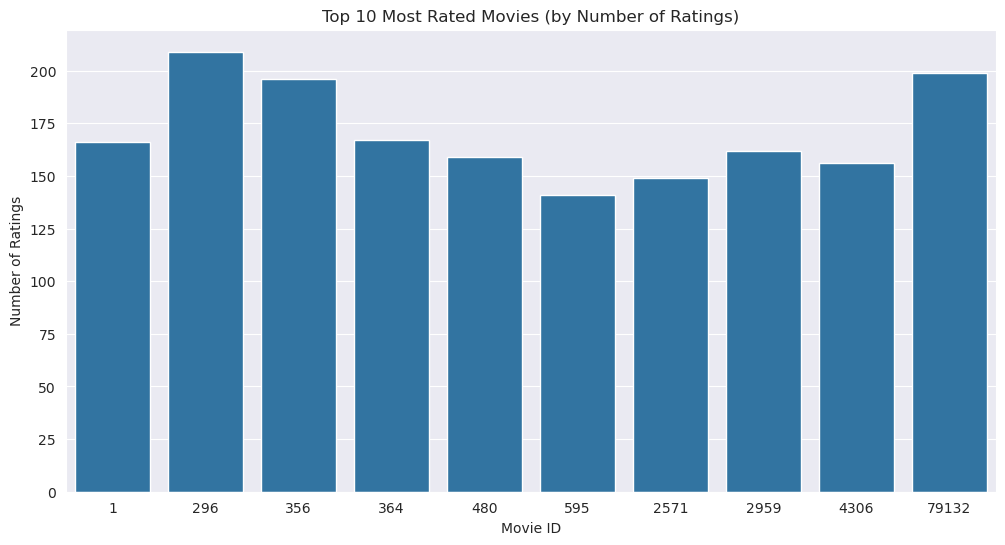

In [13]:
# Top 10 Most Rated Movies

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

plt.title('Top 10 Most Rated Movies (by Number of Ratings)')
top_movies = df['movieId'].value_counts().head(10)
sns.barplot(x=top_movies.index, y=top_movies.values)
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')

plt.show()

## 4. Modelling

#### 4.1 Create User-Movie Rating Matrix

In [14]:
from scipy.sparse import csr_matrix

df['user_idx'] = df['userId'].astype("category").cat.codes
df['movie_idx'] = df['movieId'].astype("category").cat.codes

num_users = df['user_idx'].nunique()
num_movies = df['movie_idx'].nunique()

# Build sparse user–movie matrix
sparse_user_movie = csr_matrix((df['rating'], (df['user_idx'], df['movie_idx'])),
                               shape=(num_users, num_movies))

In [18]:
# Sparse User-Movie Matrix Information 

print(f"Type: {type(sparse_user_movie)}")
print(f"Shape (Users x Movies): {sparse_user_movie.shape}")
print(f"Number of Non-Zero Elements (NNZ): {sparse_user_movie.nnz}")
print(f"Data Type of Stored Elements: {sparse_user_movie.dtype}")

# Calculate and print the densit
total_possible_elements = sparse_user_movie.shape[0] * sparse_user_movie.shape[1]
density = (sparse_user_movie.nnz / total_possible_elements) * 100
print(f"Density of the matrix: {density:.6f}%")

Type: <class 'scipy.sparse._csr.csr_matrix'>
Shape (Users x Movies): (32923, 6762)
Number of Non-Zero Elements (NNZ): 43502
Data Type of Stored Elements: float64
Density of the matrix: 0.019540%


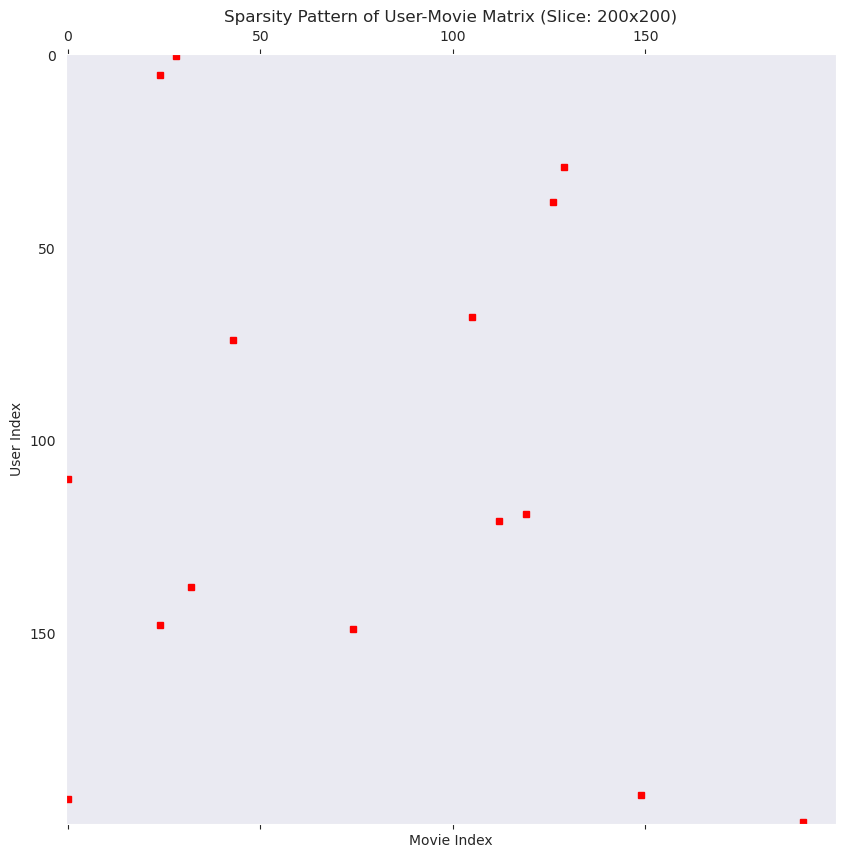

In [22]:
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported

slice_rows = 200
slice_cols = 200

sparse_slice = sparse_user_movie[:slice_rows, :slice_cols]

# Set plot style and figure size
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))

plt.spy(sparse_slice, markersize=5, color="red") 

plt.title(f'Sparsity Pattern of User-Movie Matrix (Slice: {slice_rows}x{slice_cols})')
plt.xlabel('Movie Index')
plt.ylabel('User Index')
plt.grid(False)
plt.show()

#### 4.2 Dimensionality Reduction: TruncatedSVD

In [ ]:
from sklearn.decomposition import TruncatedSVD


max_components_to_test = min(sparse_user_movie.shape) - 1

n_components_for_analysis = min(max_components_to_test, 500) 

print(f"Fitting TruncatedSVD with {n_components_for_analysis} components to analyze explained variance...")
svd_for_analysis = TruncatedSVD(n_components=n_components_for_analysis, random_state=42)
svd_for_analysis.fit(sparse_user_movie)

# Calculate Cumulative Explained Variance 
explained_variance_ratio = svd_for_analysis.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the Cumulative Explained Variance ---
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Explained Variance') # Example target
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Explained Variance') # Example target
plt.legend()
plt.tight_layout()
plt.show()

print("You can also choose the number of components that explain a desired percentage of variance (e.g., 80% or 90%).")
print(f"Total variance explained by {n_components_for_analysis} components: {cumulative_explained_variance[-1]*100:.2f}%")

# Find components needed for 80% and 90% variance
components_for_80_percent = np.where(cumulative_explained_variance >= 0.80)[0][0] + 1
components_for_90_percent = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1

print(f"Number of components to explain 80% of variance: {components_for_80_percent}")
print(f"Number of components to explain 90% of variance: {components_for_90_percent}")

In [23]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_svd = svd.fit_transform(sparse_user_movie)

In [24]:
print("X_svd shape:", X_svd.shape)
print("Type:", type(X_svd))

X_svd shape: (32923, 100)
Type: <class 'numpy.ndarray'>


## 4.3 Agglomerative Clustering 

Agglomerative Clustering completed for n_clusters=3.
Agglomerative Silhouette Score: 0.6104


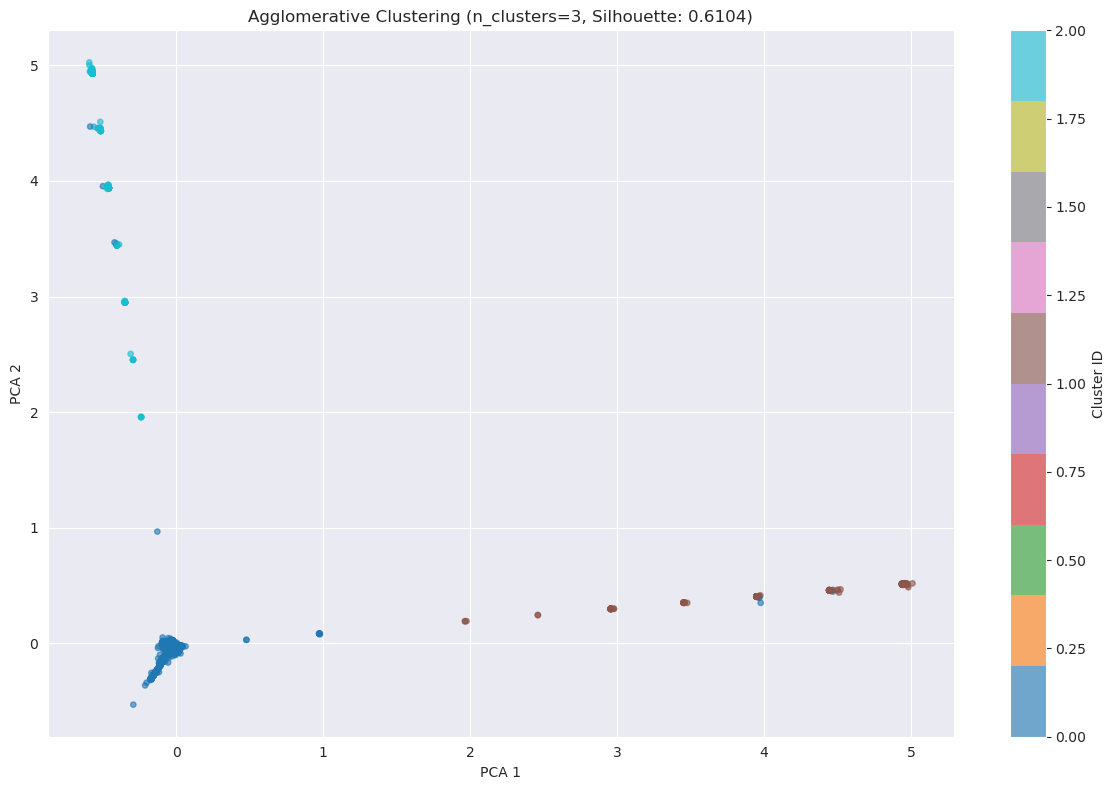

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X_svd) # X_svd contains your 100-dim user features

print(f"Agglomerative Clustering completed for n_clusters={agg.n_clusters}.")

score_agg = silhouette_score(X_svd, labels_agg)
print(f"Agglomerative Silhouette Score: {score_agg:.4f}")

# Visualize Clusters with 2D PCA
pca_2d = PCA(n_components=2, random_state=42)
X_2d_pca_agg = pca_2d.fit_transform(X_svd) # Reduces the 100 SVD dimensions to 2 for plotting

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

plt.scatter(X_2d_pca_agg[:, 0], X_2d_pca_agg[:, 1], c=labels_agg, cmap='tab10', alpha=0.6, s=15)

silhouette_text = f"{score_agg:.4f}" # Format silhouette score as string
plt.title(f"Agglomerative Clustering (n_clusters={agg.n_clusters}, Silhouette: {silhouette_text})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster ID')

plt.grid(True)
plt.tight_layout()
plt.show()

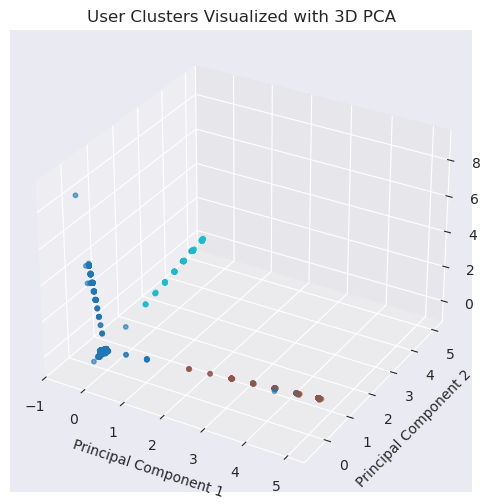

In [30]:
from mpl_toolkits.mplot3d import Axes3D
# 3D PCA visualization 

pca_3d = PCA(n_components=3, random_state=42)
X_3d_pca = pca_3d.fit_transform(X_svd)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d_pca[:, 0], X_3d_pca[:, 1], X_3d_pca[:, 2],
           c=labels_agg, cmap='tab10', alpha=0.6, s=10)
ax.set_title("User Clusters Visualized with 3D PCA")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()

#### 4.4 K-Means Model

#### Elbow Method

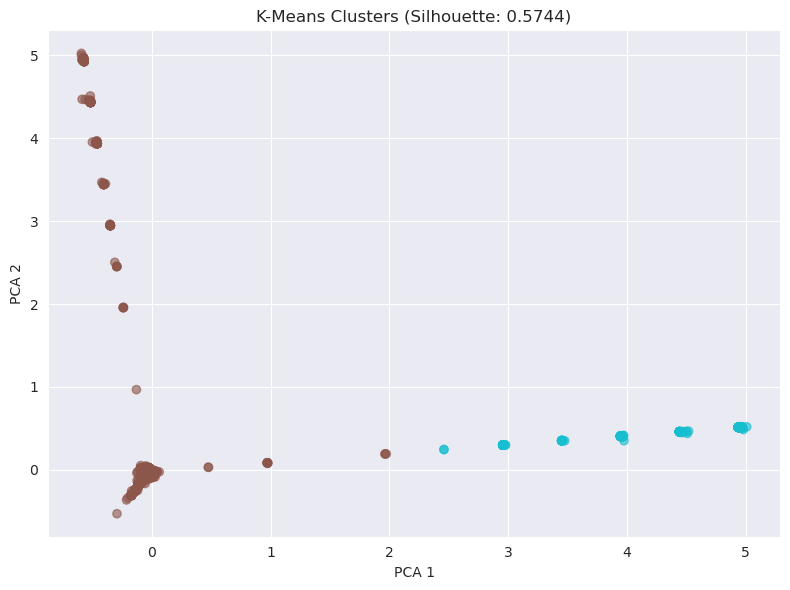

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_svd)

score = silhouette_score(X_svd, clusters)

X_2d = PCA(n_components=2).fit_transform(X_svd)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='tab10', alpha=0.6)
plt.title(f"K-Means Clusters (Silhouette: {score:.4f})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

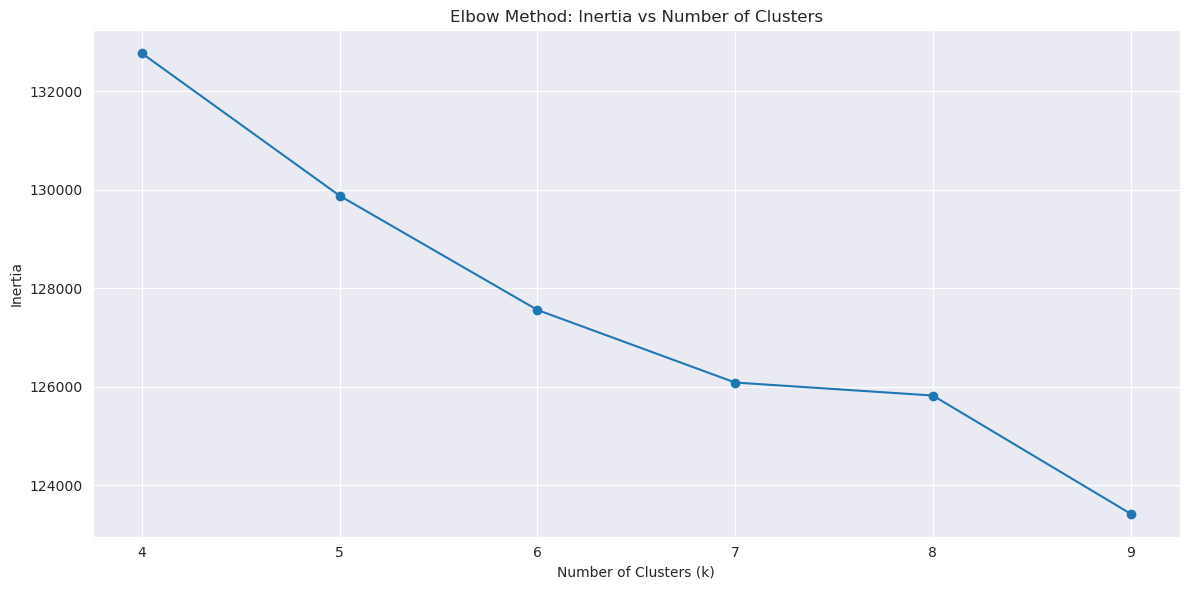

In [32]:
inertias = []
K_range = range(4, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_svd)
    inertias.append(km.inertia_)

plt.figure(figsize=(12, 6))

plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method: Inertia vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)

plt.tight_layout()
plt.show()

####  Cluster Centroids

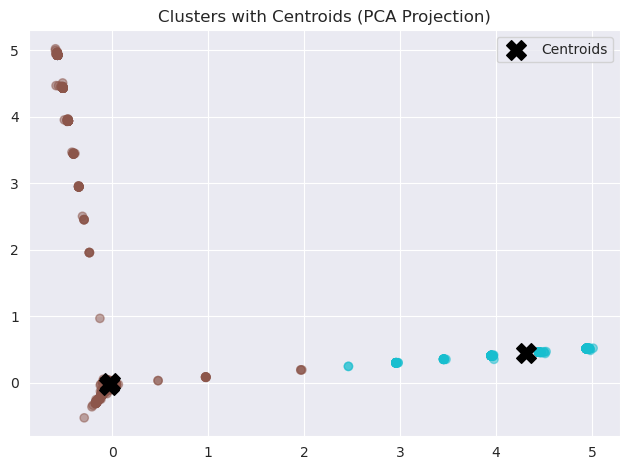

In [33]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_svd)
centroids_2d = pca.transform(kmeans.cluster_centers_)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='tab10', alpha=0.5)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.legend()
plt.title("Clusters with Centroids (PCA Projection)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.5 NMF

/home/jalloh/miniconda3/envs/ml_env/lib/python3.13/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


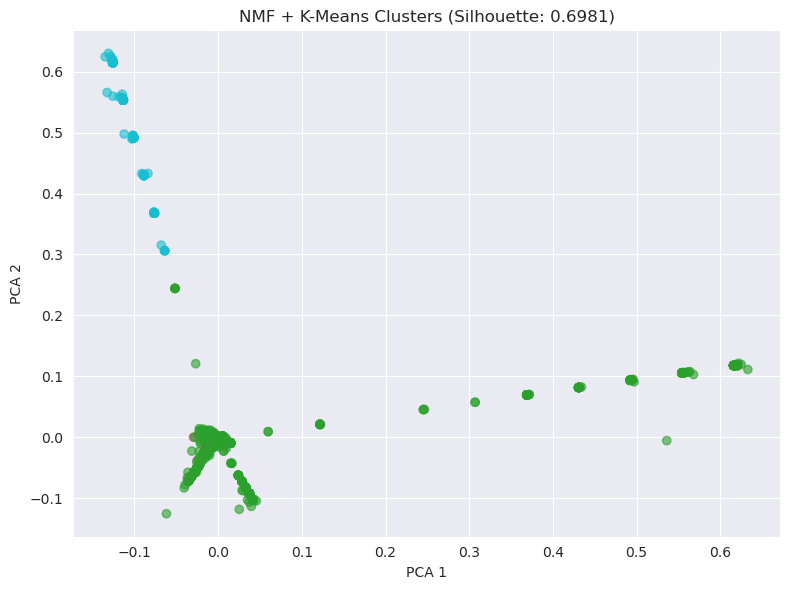

In [34]:
from sklearn.decomposition import NMF

# Apply NMF instead of TruncatedSVD
nmf = NMF(n_components=50, random_state=42)
W = nmf.fit_transform(sparse_user_movie)

# K-Means clustering on the NMF features
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(W)

# Evaluate with silhouette score
score = silhouette_score(W, clusters)

# 2D visualization via PCA
X_2d = PCA(n_components=2, random_state=42).fit_transform(W)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='tab10', alpha=0.6)
plt.title(f"NMF + K-Means Clusters (Silhouette: {score:.4f})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

/home/jalloh/miniconda3/envs/ml_env/lib/python3.13/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


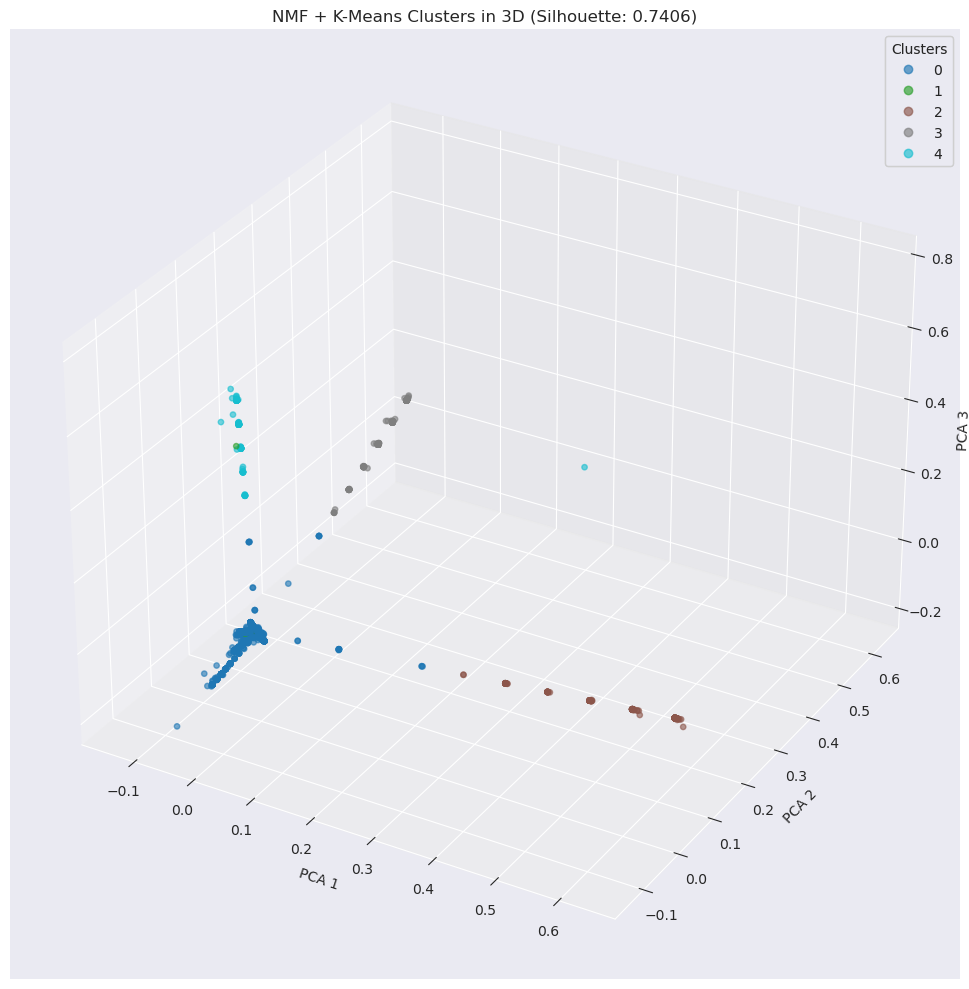

In [36]:

# Apply NMF instead of TruncatedSVD
nmf = NMF(n_components=50, random_state=42)
W = nmf.fit_transform(sparse_user_movie)

# K-Means clustering on the NMF features
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(W)

# Evaluate with silhouette score
score = silhouette_score(W, clusters)

# 3D visualization via PCA
pca_3d = PCA(n_components=3, random_state=42)
X_3d = pca_3d.fit_transform(W)

sns.set_style("darkgrid")
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],
                     c=clusters,
                     cmap='tab10',
                     alpha=0.6,
                     s=15)

ax.set_title(f"NMF + K-Means Clusters in 3D (Silhouette: {score:.4f})")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Add a color bar
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
### Fine-tunning